In [38]:
# Dependencies
# keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# import matplotlib for visualization
import matplotlib.pyplot as plt

# import numpy
import numpy as np

In [40]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Check the shape of the data
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [45]:
# normalize the input (image)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

In [46]:
print(type(x_train), x_train.shape)
print(type(x_test), x_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28, 1)
<class 'numpy.ndarray'> (10000, 28, 28, 1)


In [47]:
image = x_train[0]
image

array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]

In [49]:
label = y_train[0]
print(label)
print(type(label))

9
<class 'numpy.uint8'>


In [50]:
# normalize the output (labels)
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [52]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [53]:
# See first training sample
image, label = x_train[0], y_train[0]
# The shape of the image tensor is [1, 28, 28] or more specifically: [color_channels=1, height=28, width=28]
print(type(image), image.shape)
print(type(label))

<class 'numpy.ndarray'> (28, 28, 1)
<class 'numpy.uint8'>


In [54]:
fashion_mnist_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(fashion_mnist_classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [55]:
def plot_image(image, title=None, cmap="gray"):
    plt.imshow(image, cmap=cmap)
    if title:
        plt.title(title)
    plt.show()

Image shape: (28, 28)


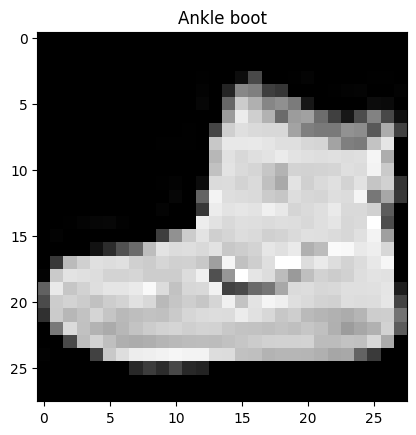

In [56]:
# get first sample
image, label = x_train[0], y_train[0]
image = np.squeeze(image, axis=-1)
title = fashion_mnist_classes[label]
print(f"Image shape: {image.shape}")

plot_image(image, title)

In [15]:
def plot_images_grid(images, grid_size, titles, size=(16, 16), cmap="gray"):
    nrows, ncols = grid_size

    if len(images) > nrows * ncols:
        raise ValueError(
            "The number of images exceeds the grid size. Please increase the grid size or reduce the number of images."
        )

    if nrows == 1 and ncols == 1:
        _, ax = plt.subplots(figsize=size)
        ax.imshow(images[0], cmap)
        if titles is not None:
            ax.set_title(titles[0])
        ax.axis("off")
    else:
        _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=size)
        for idx, ax in enumerate(axes.flat):
            if idx < len(images):
                ax.imshow(images[idx], cmap=cmap)
                if titles is not None and idx < len(titles):
                    ax.set_title("title: {}, index: {}".format(titles[idx], idx))

            ax.axis("off")
    plt.show()

In [37]:
def create_fashion_mnist_convnet(input_shape, hidden_units, output_shape):
    model = Sequential()

    # ConvNet Block 1
    model.add(Conv2D(filters=hidden_units, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=hidden_units, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # ConvNet Block 2
    model.add(Conv2D(filters=hidden_units, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=hidden_units, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Classifier
    model.add(Flatten())
    model.add(Dense(units=output_shape, activation='softmax'))

    return model

# Example usage:
input_shape = (28, 28, 1)
hidden_units = 32
output_shape = 10  # Number of classes for FashionMNIST

model = create_fashion_mnist_convnet(input_shape, hidden_units, output_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                 

In [82]:
# Compile the model
optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
# training data
x_train_partial = x_train
y_train_partial = y_train_one_hot

# validation data
x_val = x_test
y_val = y_test_one_hot

In [84]:
print(x_train_partial.shape)
print(y_train_partial.shape)

(60000, 28, 28, 1)
(60000, 10)


In [85]:
# Training the model
history = model.fit(x_train_partial,
                    y_train_partial,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 2.3028 - accuracy: 0.1009 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 23s 13ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 -

In [86]:
history.history

{'loss': [2.3028218746185303,
  2.302687644958496,
  2.3026936054229736,
  2.302699327468872,
  2.302703619003296,
  2.3026931285858154,
  2.3026986122131348,
  2.3026912212371826,
  2.30269455909729,
  2.302699565887451],
 'accuracy': [0.10085000097751617,
  0.09996666759252548,
  0.09823333472013474,
  0.09991666674613953,
  0.09823333472013474,
  0.09939999878406525,
  0.09908333420753479,
  0.09848333150148392,
  0.09911666810512543,
  0.09839999675750732],
 'val_loss': [2.302610397338867,
  2.3026015758514404,
  2.302598714828491,
  2.302604913711548,
  2.30259370803833,
  2.302597761154175,
  2.3025965690612793,
  2.302611827850342,
  2.3026061058044434,
  2.3026041984558105],
 'val_accuracy': [0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612]}

In [87]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [75]:
def plot_loss(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    print(epochs)

    # Visualize the loss
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)
    print(epochs)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

range(1, 11)


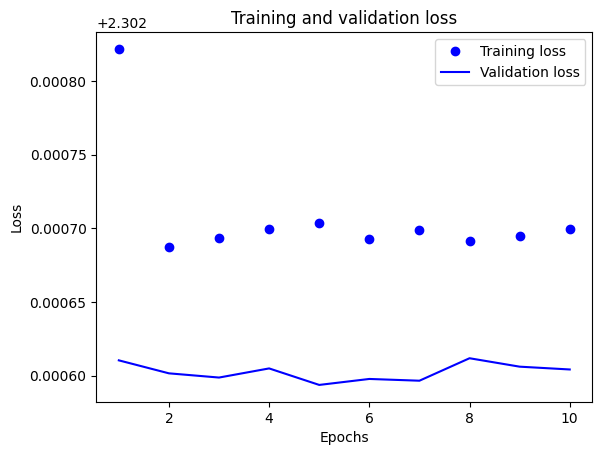

In [88]:
plot_loss(history_dict)

range(1, 11)


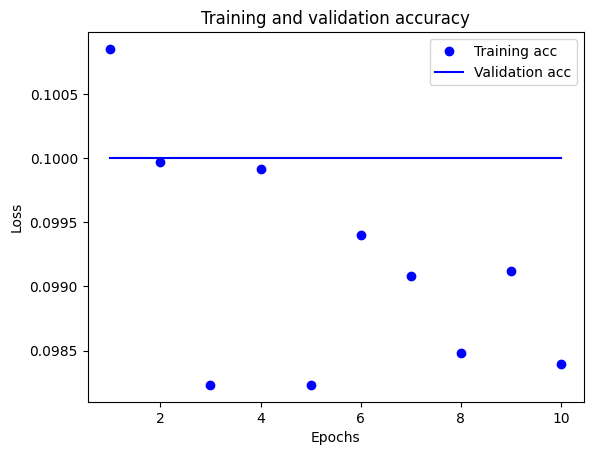

In [89]:
plot_accuracy(history_dict)

In [90]:
results = model.evaluate(x_test, y_test_one_hot)
print(results)

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
[2.3026041984558105, 0.10000000149011612]


In [91]:
# predict
x_pred = x_test[:10]
y_pred = y_test[:10]

print('input')
# print(x_pred)
print(y_pred)

predictions = model.predict(x_pred)
print('prediction')
print(predictions.shape)
print(predictions)
print(np.argmax(predictions, axis=1))

input
[9 2 1 1 6 1 4 6 5 7]
1/1 [==============================] - 0s 45ms/step
prediction
(10, 10)
[[0.10002517 0.10097253 0.10058918 0.0989816  0.1000061  0.09985057
  0.10018318 0.10067456 0.09901618 0.0997009 ]
 [0.10002517 0.10097253 0.10058918 0.0989816  0.1000061  0.09985057
  0.10018318 0.10067456 0.09901618 0.0997009 ]
 [0.10002517 0.10097253 0.10058918 0.0989816  0.1000061  0.09985057
  0.10018318 0.10067456 0.09901618 0.0997009 ]
 [0.10002517 0.10097253 0.10058918 0.0989816  0.1000061  0.09985057
  0.10018318 0.10067456 0.09901618 0.0997009 ]
 [0.10002517 0.10097253 0.10058918 0.0989816  0.1000061  0.09985057
  0.10018318 0.10067456 0.09901618 0.0997009 ]
 [0.10002517 0.10097253 0.10058918 0.0989816  0.1000061  0.09985057
  0.10018318 0.10067456 0.09901618 0.0997009 ]
 [0.10002517 0.10097253 0.10058918 0.0989816  0.1000061  0.09985057
  0.10018318 0.10067456 0.09901618 0.0997009 ]
 [0.10002517 0.10097253 0.10058918 0.0989816  0.1000061  0.09985057
  0.10018318 0.10067456 0.0